# Hands-on Exercise for CLUS Module


### 0. Setting up necessary packages and creating data 

In [1]:
!pip install --user scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.6/site-packages
Requirement already up-to-date: numpy>=1.11.0 in ./.local/lib/python3.6/site-packages (from scikit-learn)
Requirement already up-to-date: joblib>=0.11 in ./.local/lib/python3.6/site-packages (from scikit-learn)
Requirement already up-to-date: scipy>=0.17.0 in ./.local/lib/python3.6/site-packages (from scikit-learn)
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Import necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



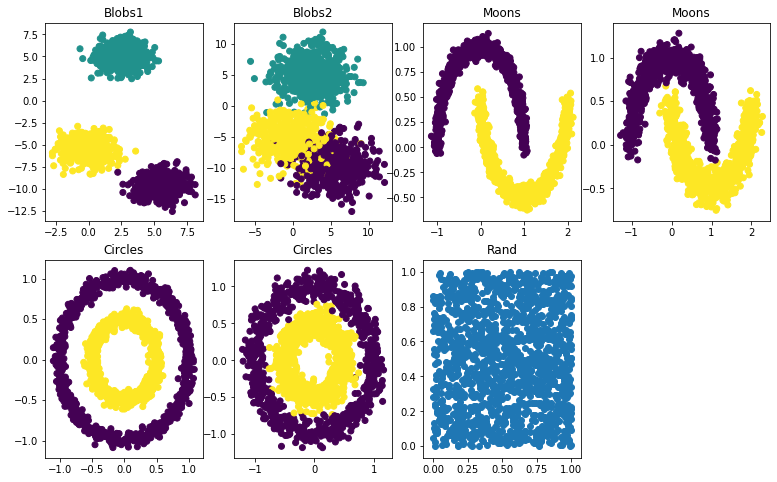

In [3]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [4]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [5]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [6]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>Blobs1, Blobs2 are the datasets that are expected to work well using K-means CLustering.The K means works well for gobular structures as it forms the cluster which are nearer to k centroids. 

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>Circles1,Circles2,Moons1,Moons2 data are expected to not wrok well for k-means clustering. K means form the clusters which are at nearer distances to the k-centroids respectively.In the circles and moons data, finding such near points using centroid will go resulting wrong clusters as moons data the points in a cluster are nearer to other cluster.


<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

Blobs1 K-Means score: 2875.575460810548
Blobs2 K-Means score: 16414.2674115897
Circles1 K-Means score: 598.020543255273
Circles2 K-Means score: 611.2805756529305
Moons1 K-Means score: 601.2025348798403
Moons2 K-Means score: 616.0456903326541


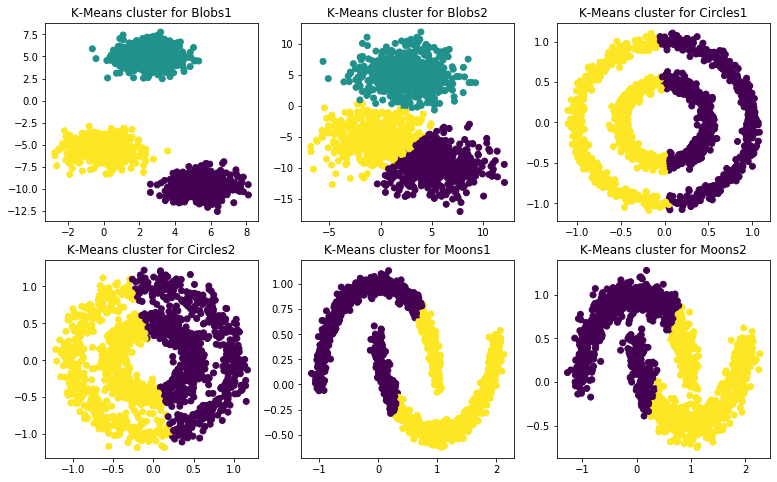

In [8]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
plt.figure(figsize=(13,8))
count = 1
for data_x,label,no in zip(clusters_x,labels,clusters) :
    n_clusters =no
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
    y_pred = kmeans.fit_predict(data_x)
    score = -kmeans.score(data_x)
    print(label+" K-Means score: "+str(score))
    ax = plt.subplot(2,3,count)
    plt.scatter(data_x[:, 0], data_x[:, 1], c=y_pred)  # KMeans clusters
    count = count+1
    plt.title('K-Means cluster for '+label)
plt.show()

<span style="color:green">**Answer:** </span>

the k means worked well for Blobs data<br> since the bloabs data is gobular it is expected to worked well. though circles 2 is also gobular it is present as cluster inside the cluster. so the circles data not worked well and moon shaped is desnity packed and k means could nt work well as within points cluster is far and points in other cluster are near.<br>
decreasing order of datasets (Blobs1,Blobs2,Moons2,circles2,Moons1,cirlces1)


<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

In [9]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

In [11]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
clusters_y = [Blobs1_y,Blobs2_y,Circles1_y,Circles2_y,Moons1_y,Moons2_y]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
count = 1
for data_x,data_y,label,no in zip(clusters_x,clusters_y,labels,clusters) :
    n_clusters =no
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
    y_pred = kmeans.fit_predict(data_x)
    print("rand index for "+label+": " + str(rand_index(y_pred, data_y)))

rand index for Blobs1: 0.99911140760507
rand index for Blobs2: 0.9207142539470758
rand index for Circles1: 0.4996744496330887
rand index for Circles2: 0.4996806760062264
rand index for Moons1: 0.6201236379808761
rand index for Moons2: 0.6240836112964199


<span style="color:green">**Answer:** </span>

Blobs1>Blobs2>Moons2>Moons1>circles2>Circles1

<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
the ranks in both of them are not same. but they are almost the same since there is no much difference between the cluster shape formation of all the datasets. and also the rand index is also no much difference between datasets like in the visualization.


### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>

The single link aglomerative clustering might work well for Blobs1,Moon1,Circles1 data as the clustering are far from each other. <br>it works in such a way that it forms clusters grouping pair of points whcih are closest at each step. since the clusters are far away so the points with in the same cluster are able to identfy as one cluster in these datasets.

<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>

Blobs2, Moon2,Circles2 data sets might not work well for this clustering.the clustering works in such a way that it forms clusters grouping pair of points whcih are closest at each step.<br> here the points of two clusters are close to each other. so the datasets might pair up the points in other clusters as well and misinterpreting as one cluster. 

<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

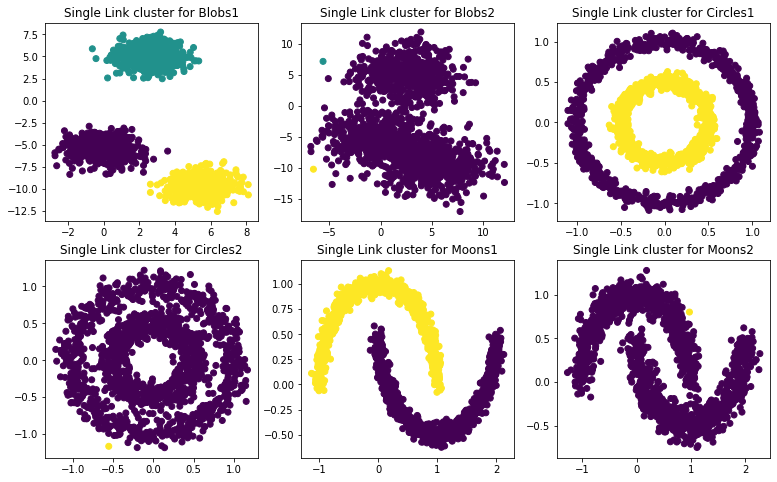

In [12]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
plt.figure(figsize=(13,8))
count = 1
for data_x,label,no in zip(clusters_x,labels,clusters) :
    n_clusters =no
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
    y_pred = single_linkage.fit_predict(data_x)
    ax = plt.subplot(2,3,count)
    plt.scatter(data_x[:, 0], data_x[:, 1], c=y_pred)  # KMeans clusters
    count = count+1
    plt.title('Single Link cluster for '+label)
plt.show()

<span style="color:green">**Answer:** </span>
Circles1>Moons1>Blobs1>Circles2>Moons2>Blobs2
<br>the circles are ranked accordingly by the distance between the clusters. the distance for circles2,moons2 and Blobs2 are having larger distances when comapred to blobs2,circles2,and moons2 dataset.

<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [13]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
clusters_y = [Blobs1_y,Blobs2_y,Circles1_y,Circles2_y,Moons1_y,Moons2_y]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
count = 1
for data_x,data_y,label,no in zip(clusters_x,clusters_y,labels,clusters) :
    n_clusters =no
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters);
    y_pred = single_linkage.fit_predict(data_x)
    print("rand index for "+label+": " + str(rand_index(y_pred, data_y)))

rand index for Blobs1: 0.99911140760507
rand index for Blobs2: 0.33377896375361354
rand index for Circles1: 1.0
rand index for Circles2: 0.49966733377807426
rand index for Moons1: 1.0
rand index for Moons2: 0.49966733377807426


<span style="color:green">**Answer:** </span>
Circles1 = Moons1 > Blobs1 > Moons2  = Circles2 > Blobs2 


<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>the ranks are consistent in both the observations.

### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Blobs1 and Blobs2 might work for Complete link. the complete link take the maximum distance between two points of the two clusters. its works more good for the Blobs1 than Blobs2 dataset.



<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
the Complete link may not work for both datasets of Moon and Circles.since it takes the farthest distance of points between the two clusters it goes wrong when we take the gobular structures and circles, tends to break the clusters which are big.

<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

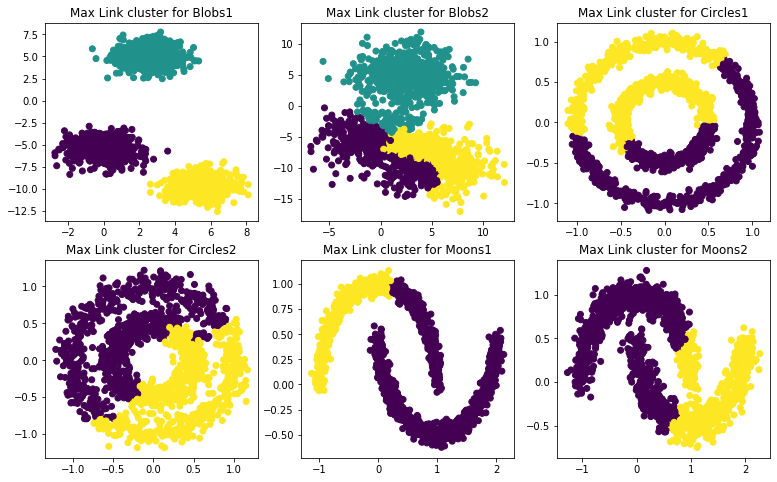

In [35]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
plt.figure(figsize=(13,8))
count = 1
for data_x,label,no in zip(clusters_x,labels,clusters) :
    n_clusters =no
    Max_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
    y_pred = Max_linkage.fit_predict(data_x)
    ax = plt.subplot(2,3,count)
    plt.scatter(data_x[:, 0], data_x[:, 1], c=y_pred)  # KMeans clusters
    count = count+1
    plt.title('Max Link cluster for '+label)
plt.show()

<span style="color:green">**Answer:** </span>
Blobs1>Blobs2>Moons1>Moons2>Circles1>Circles2. from the visualization of datasets. the blobs1 and blobs2 are seperated more. the other datasets are mixed up and not clustered well due to their max_clustering limitations. In moons the cluster separated but the other cluster is mixed with frist cluster.


<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [36]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
clusters_y = [Blobs1_y,Blobs2_y,Circles1_y,Circles2_y,Moons1_y,Moons2_y]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
count = 1
for data_x,data_y,label,no in zip(clusters_x,clusters_y,labels,clusters) :
    n_clusters =no
    Max_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters);
    y_pred = Max_linkage.fit_predict(data_x)
    print("rand index for "+label+": " + str(rand_index(y_pred, data_y)))

rand index for Blobs1: 0.99911140760507
rand index for Blobs2: 0.7736544362908606
rand index for Circles1: 0.5218714698688014
rand index for Circles2: 0.5000587058038692
rand index for Moons1: 0.662605292417167
rand index for Moons2: 0.5965310206804536


<span style="color:green">**Answer:** </span>Blobs1>Blobs2>Moons1>moons2>Circles1>Circles2



<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
yes the ranking in both are same 

### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
the Blobs 1 work well for the average clustering. since they are well seperated where the clustering is formed by taking the centroid of data points. this works well


<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>

Blobs2,Mooons1,Moons2,Circles1 and circles2 data set may not work well as the algorithms work on by computing the simillarities taking the average of it. and also it is nothing but the compromise of single link and complete link coverage. so mostly te datsets which didnt wrk well for these may not work well for average also

<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

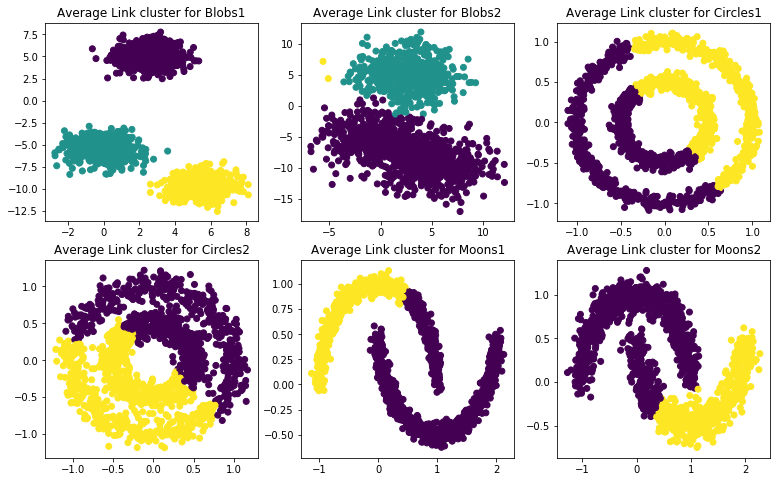

In [124]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
plt.figure(figsize=(13,8))
count = 1
for data_x,label,no in zip(clusters_x,labels,clusters) :
    n_clusters =no
    Average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
    y_pred = Average_linkage.fit_predict(data_x)
    ax = plt.subplot(2,3,count)
    plt.scatter(data_x[:, 0], data_x[:, 1], c=y_pred)  # KMeans clusters
    count = count+1
    plt.title('Average Link cluster for '+label)
plt.show()

<span style="color:green">**Answer:** </span>
Blobs1> Blobs2> Moons1> Moons2 > Circles 2> Circles 1. 
From the visualization of data the Blobs 1 is well seperated. Blobs 2 is sepearated but not totally and the same with Moons 1 and Moons2 as well.<br> since the average clustering takes the centroid and then forms the clusters it fails for Circles1 and Circles2.



<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [97]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
clusters_y = [Blobs1_y,Blobs2_y,Circles1_y,Circles2_y,Moons1_y,Moons2_y]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
count = 1
for data_x,data_y,label,no in zip(clusters_x,clusters_y,labels,clusters) :
    n_clusters =no
    Average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters);
    y_pred = Average_linkage.fit_predict(data_x)
    print("rand index for "+label+": " + str(rand_index(y_pred, data_y)))

rand index for Blobs1: 0.99911140760507
rand index for Blobs2: 0.7636575494774294
rand index for Circles1: 0.500414498554592
rand index for Circles2: 0.5050780520346898
rand index for Moons1: 0.7132310429175005
rand index for Moons2: 0.7457647320435846


<span style="color:green">**Answer:** </span>
Blobs1>Blobs2>Moons2>Moons1>Circles2>circles1


<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
the rankings were consistent in both of them


### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
The Datasets Blobs1,Circles1,Circles2,Moon1,Moon2 might work well since the datasets are densely packed and Density based works well


<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
the Blobs2 Dataset might not work well as they are closely pack and DBScan might find difficult to cluster the points as well



<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

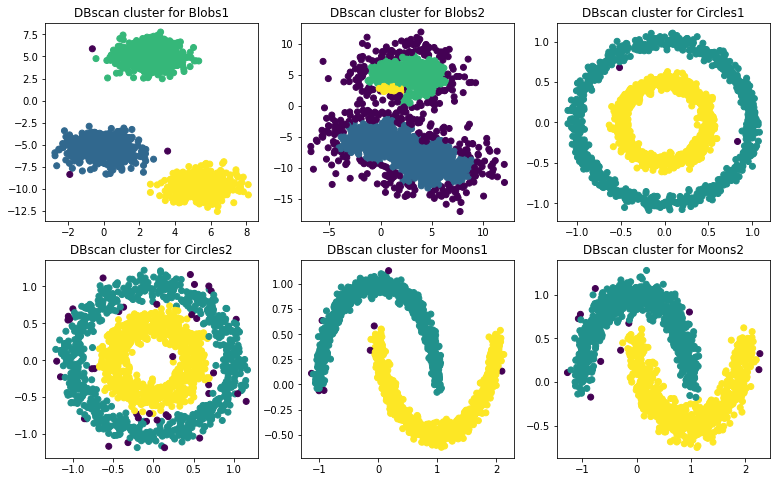

In [125]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
eps_values = [1,0.67,0.09,0.11,0.08,0.13]
plt.figure(figsize=(13,8))
count = 1
for data_x,label,eps in zip(clusters_x,labels,eps_values) :
    dbscan = DBSCAN(eps=eps, min_samples=10)
    y_pred = dbscan.fit_predict(data_x)
    ax = plt.subplot(2,3,count)
    plt.scatter(data_x[:, 0], data_x[:, 1], c=y_pred)  # KMeans clusters
    count = count+1
    plt.title('DBscan cluster for '+label)
plt.show()

<span style="color:green">**Answer:** </span>
Circles1>Blobs1>Moon1>Moon2>Circles2>Blobs2. the datasets were ranked by the noise points in the above plot


<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

In [109]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
eps_values = [1,0.67,0.09,0.11,0.08,0.13]
plt.figure(figsize=(13,8))
count = 1
for data_x,label,eps in zip(clusters_x,labels,eps_values) :
    dbscan = DBSCAN(eps=eps, min_samples=10)
    y_pred = dbscan.fit_predict(data_x)
    noise = np.sum(y_pred==-1)
    print("noise points for "+label+": "+str(noise))

noise points for Blobs1: 3
noise points for Blobs2: 409
noise points for Circles1: 2
noise points for Circles2: 37
noise points for Moons1: 8
noise points for Moons2: 11


<span style="color:green">**Answer:** </span>
Blobs1,Moons1,Circles1 had least noise points. because the points in these clusters are densely packed and formed clusters and the probbaility of outliers is less when the data is dense packed.

<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [122]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
clusters_y = [Blobs1_y,Blobs2_y,Circles1_y,Circles2_y,Moons1_y,Moons2_y]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
eps_values = [0.9,0.67,0.09,0.11,0.08,0.13]
for data_x,data_y,label,eps in zip(clusters_x,clusters_y,labels,eps_values) :
    dbscan = DBSCAN(eps=eps, min_samples=10)
    y_pred = dbscan.fit_predict(data_x) 
    y_pred = np.where(y_pred==-1, 3, y_pred)
    print("rand index for "+label+": " + str(rand_index(y_pred, data_y)))

rand index for Blobs1: 0.9973377807427174
rand index for Blobs2: 0.687180787191461
rand index for Circles1: 0.998669335112297
rand index for Circles2: 0.9643344451856793
rand index for Moons1: 0.9946800088948188
rand index for Moons2: 0.9926946853457861


<span style="color:green">**Answer:** </span>
Circles1>Blobs1>Moon1>Moon2>Circles2>Blobs2


<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
the rankings in both the observations are consistent

### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
Blobs1 and Blobs2 Datasets might work well for the spectral clustering since the points are very near. SPectral clustering uses the nearest neighbour method to form the cluster.


<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
the Datasets Moons1,Moons2,Circles1 and Circles2 Data sets may not work well since it uses the nearest neighbour method in clustering these data sets might not work well as points within cluster are far away within a cluster.


<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

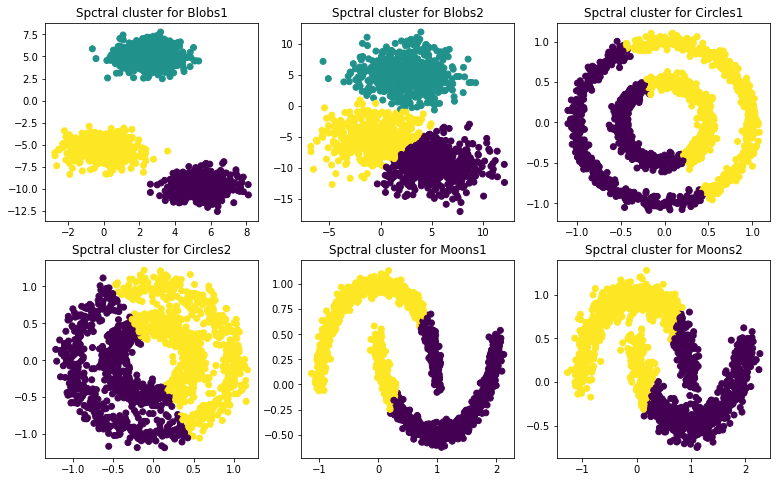

In [127]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
plt.figure(figsize=(13,8))
count = 1
for data_x,label,no in zip(clusters_x,labels,clusters) :
    n_clusters =no
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
    y_pred = spectral.fit_predict(data_x)
    ax = plt.subplot(2,3,count)
    plt.scatter(data_x[:, 0], data_x[:, 1], c=y_pred)  # KMeans clusters
    count = count+1
    plt.title('Spctral cluster for '+label)
plt.show()

<span style="color:green">**Answer:** </span>
Blobs1> Blobs2>Moons2>Moons1>Circle2>Circle1.The datasets for Blobs were clustered very well but the remaining datasets were not clustered well.


<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [128]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
clusters_y = [Blobs1_y,Blobs2_y,Circles1_y,Circles2_y,Moons1_y,Moons2_y]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
clusters = [3,3,2,2,2,2]
count = 1
for data_x,data_y,label,no in zip(clusters_x,clusters_y,labels,clusters) :
    n_clusters =no
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
    y_pred = spectral.fit_predict(data_x)
    print("rand index for "+label+": " + str(rand_index(y_pred, data_y)))

rand index for Blobs1: 0.99911140760507
rand index for Blobs2: 0.919189682010229
rand index for Circles1: 0.49966733377807426
rand index for Circles2: 0.4997553924838781
rand index for Moons1: 0.6441263064265066
rand index for Moons2: 0.6448441183010896


<span style="color:green">**Answer:** </span>
Blobs1> Blobs2>Moons2>Moons1>Circle2>Circle1


<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
The Ranking were almost same in both the observations.

### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

In [133]:
clusters_x = [Blobs1_X,Blobs2_X,Circles1_X,Circles2_X,Moons1_X,Moons2_X]
labels = ["Blobs1","Blobs2","Circles1","Circles2","Moons1","Moons2"]
for i,j in zip(clusters_x,labels):
    print("Hopkins statistic for "+j+": "+ str(hopkins(i)))
    

Hopkins statistic for Blobs1: 0.9282005449526708
Hopkins statistic for Blobs2: 0.8267676355238314
Hopkins statistic for Circles1: 0.8331869616009775
Hopkins statistic for Circles2: 0.7884524799623358
Hopkins statistic for Moons1: 0.919816692592061
Hopkins statistic for Moons2: 0.8844222961074151


<span style="color:green">**Answer:** </span>
Blobs1>Moons1>Moons2>Circles1>Blobs2>Circles2

<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer:** </span>



<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

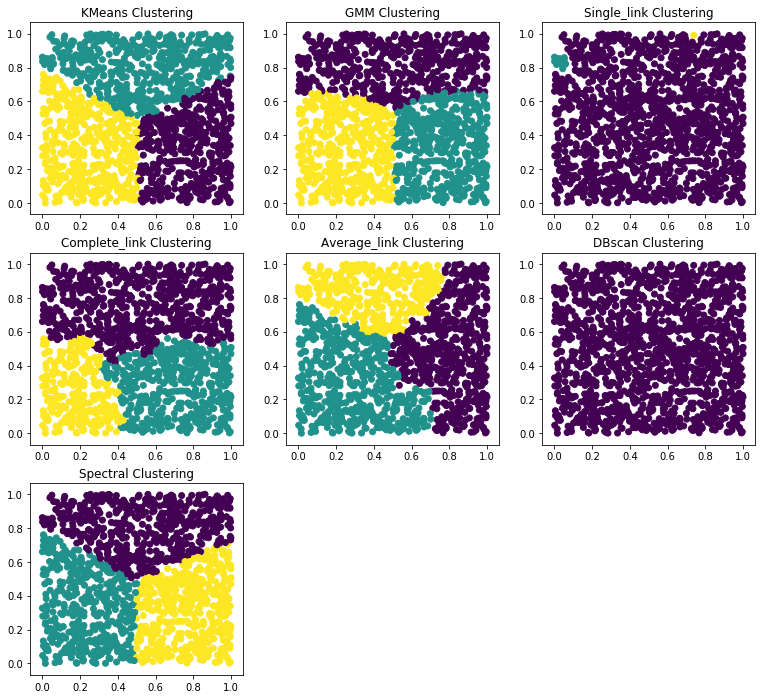

In [120]:
labels = ["KMeans","GMM","Single_link","Complete_link","Average_link","DBscan","Spectral"]
plt.figure(figsize=(13,12))
count = 1
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
dbscan = DBSCAN(eps=1, min_samples=10)
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
methods = [kmeans,gmm,single_linkage,complete_linkage,average_linkage,dbscan,spectral]
for label,method in zip(labels,methods) :
    y_pred = method.fit_predict(Rand_X)
    ax = plt.subplot(3,3,count)
    plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)  # KMeans clusters
    count = count+1
    plt.title(label+' Clustering')
plt.show()

<span style="color:green">**Answer:** </span> the random dataset for Spctral and KNN Clustering is almost the same. because these both algorithms use to pair the nearest neighbour-hood  points and forms clustering.<br>the Dbscan algorithm form the clusters which are densely packed. since the points for that alogirthm are densely packed it forms one single clustering.<br>the single link clustering takes the advantage of minimum distance between the points and forms 
<br>the complete link clustering takes the advantage of maximum distance of points between the clusters. comlete link tends to break the large clusters.<br>
thethe average link is nothing but the compromise of both the single and complete link clusterings. it take the advantage of forming clusters by centroids of lusters.<br>
the GMM is simillar to KNN here forming K gausians instead of K centroids. the clusters are formed by the probabilities of being in a different clusters.


### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [8]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [161]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [12]:
Cancer_X.shape

(569, 30)

In [142]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [14]:
score = np.zeros(41);
for i in range(2,41):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Cancer_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Cancer_X)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for k= 38 : 1496563.45
SSE for k

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

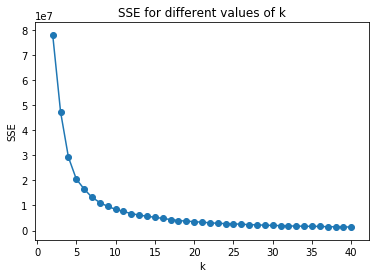

In [15]:
plt.plot(range(2,41),score[2:41])
plt.scatter(range(2,41),score[2:41])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:** </span>
Beyond 5 there is no significant reduction in SSE. so k = 5


<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

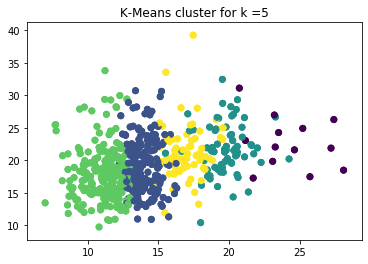

In [18]:
kmeans = KMeans(n_clusters=5, random_state=random_state);
y_pred = kmeans.fit_predict(Cancer_X)
score = -kmeans.score(Cancer_X)
fig = plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=y_pred)  # KMeans clusters
plt.title('K-Means cluster for k =5')
plt.show()

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

0.5102292997907839
0.41706091821234437
0.4869087357273466
0.4321139229282722
0.5678494262685283
0.4779166610632351


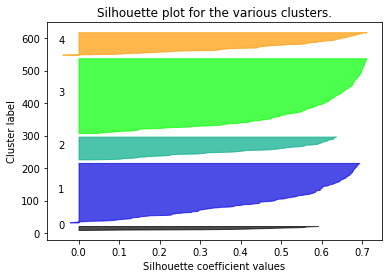

In [19]:
sample_silhouette_values = silhouette_samples(Cancer_X, y_pred)
print(np.mean(sample_silhouette_values))
for i in range(0,5):
    print(np.mean(sample_silhouette_values[y_pred==i]))
silhouette(Cancer_X,y_pred)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer:** </span>None of the clusters are treated as good clusters.<br> but clusters i.e class- 1,4,3 would be treated as a good clustering since the values are relatively high and silhouete cofficent from othe observation is good compared to others.<br>
class-0,2 are not considered as good clustering since the silhouette cofficinet is low compared to others.



<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [20]:
rand_index(y_pred, Cancer_y)

0.6625473402807001

<span style="color:green">**Answer:** </span>the clusters are not formed well since the rand index showing the relatively low value which indicates the simillarity between the clusters is not good enough.



<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

[[1 1 1 2 1]
 [2 2 1 1 1]
 [1 1 1 2 2]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


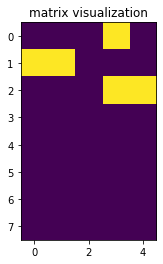

In [108]:
import numpy
eps = [50, 100, 150, 200, 250, 300, 400, 500]
min_samples = [10, 15, 20, 25, 30]
i=0;
a = numpy.zeros(shape=(8,5),dtype= int)
for e in eps:
    j=0;
    for m in min_samples:
        dbscan = DBSCAN(eps=e, min_samples=m)
        y_pred = dbscan.fit_predict(Cancer_X)
        a[i][j]= max(y_pred)+1
        j=j+1
    i=i+1
print(a)
plt.imshow(a)
plt.title('matrix visualization')
plt.show()

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

[[187 195 206 220 262]
 [ 56 100 143 148 158]
 [ 27  34  41  62  96]
 [ 20  21  25  31  31]
 [ 18  20  20  22  22]
 [ 12  15  19  20  21]
 [ 11  11  11  13  13]
 [  5   8   8  11  11]]


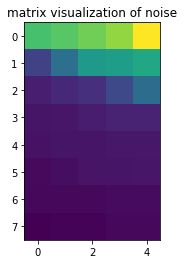

In [110]:
import numpy
eps = [50, 100, 150, 200, 250, 300, 400, 500]
min_samples = [10, 15, 20, 25, 30]
i=0;
a = numpy.zeros(shape=(8,5),dtype=int)
for e in eps:
    j=0;
    for m in min_samples:
        dbscan = DBSCAN(eps=e, min_samples=m)
        y_pred = dbscan.fit_predict(Cancer_X)
        a[i][j]= sum(y_pred==-1)
        j=j+1
    i=i+1
print(a)
plt.imshow(a)
plt.title('matrix visualization of noise')
plt.show()

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:** </span>
as the distance between the points eps increases the number of outliers decreases and the minpoints showing the opposite behaviour. as the minpoint creases i.e the number points to form a cluster increases the outliers also increases from the observation to evry particular eps.

<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.



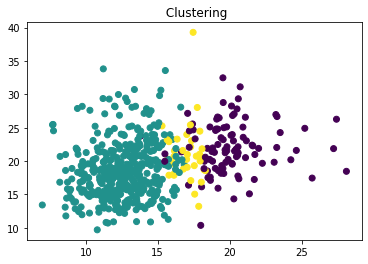

In [177]:
dbscan = DBSCAN(eps =100, min_samples=15)
y_pred=dbscan.fit_predict(Cancer_X)
fig = plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=y_pred)  # KMeans clusters
plt.title(' Clustering')
plt.show()

In [175]:

dbscan = DBSCAN(eps=100, min_samples=15)
y_pred = dbscan.fit_predict(Cancer_X)
y_pred = np.where(y_pred == -1,3,y_pred)
print("rand index for eps="+str(100)+", min sample= "+str(15)+ ":" + str(rand_index(y_pred, Cancer_y)))

rand index for eps=100, min sample= 15:0.7419614346889775


<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer:** </span>
the k means is able to cluster the data with good clusters. where as the DB scan is facing the issues wiht outliers. the kmeans performs the best as the data in higher dimesions may not be closely packed and forms many outliers where it become problem to the DBscan. so to my observations k means is the better choice.